In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_dataset = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
merged_dataset.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
urban_df = merged_dataset[merged_dataset["type"] == "Urban"]
suburban_df = merged_dataset[merged_dataset["type"] == "Suburban"]
rural_df = merged_dataset[merged_dataset["type"] == "Rural"]

In [4]:
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [5]:
urban_average_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_df.groupby(["city"]).mean()["fare"]

In [6]:
urban_total_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_total_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_total_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.savefig(*args, **kwargs)>

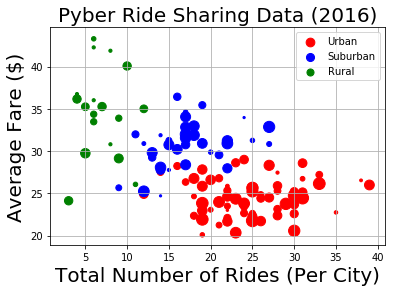

In [7]:
# Obtain the x and y coordinates for each of the three city types(kind="scatter", x="Total Number of Rides(Per City)", y="Average Fare ($)", s=area1, color="light red")
plt.scatter(urban_ride_count,urban_average_fare, s=2*urban_total_drivers, c='r', marker='o', label="Urban")
plt.scatter(suburban_ride_count,suburban_average_fare, s=5*suburban_total_drivers, c='b', marker='o', label="Suburban")
plt.scatter(rural_ride_count,rural_average_fare, s=10*rural_total_drivers, c='g', marker='o', label="Rural")
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend
plt.legend(fontsize=10)
plt.grid()
# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=20)
# Save Figure
plt.savefig


In [8]:
# Show plot
plt.show()

## Total Fares by City Type

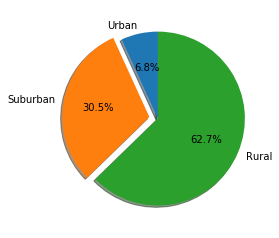

In [9]:
fare_totals = 100 * merged_dataset.groupby(["type"]).sum()["fare"] / merged_dataset["fare"].sum()


labels = 'Urban', 'Suburban', 'Rural'
explode = (0, 0.1, 0)


fig1, ax1 = plt.subplots()
plt.title
ax1.pie(fare_totals, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

In [11]:
# Calculate Ride Percents
totals_drivers = 100 * merged_dataset.groupby(["type"]).count()["fare"] / merged_dataset["fare"].count()

([<matplotlib.patches.Wedge at 0x24c5b1ab8d0>,
 [Text(0.03031318294239641, 3.299860771447775, 'Urban'),
  Text(-2.745953137580357, 1.8302298670420047, 'Suburban'),
  Text(2.407256136503781, -2.257236782720167, 'Rural')],
 [Text(0.016534463423125312, 1.7999240571533315, '5.3%'),
  Text(-1.4977926204983762, 0.9983072002047296, '26.3%'),
  Text(1.313048801729335, -1.2312200633019093, '68.4%')])

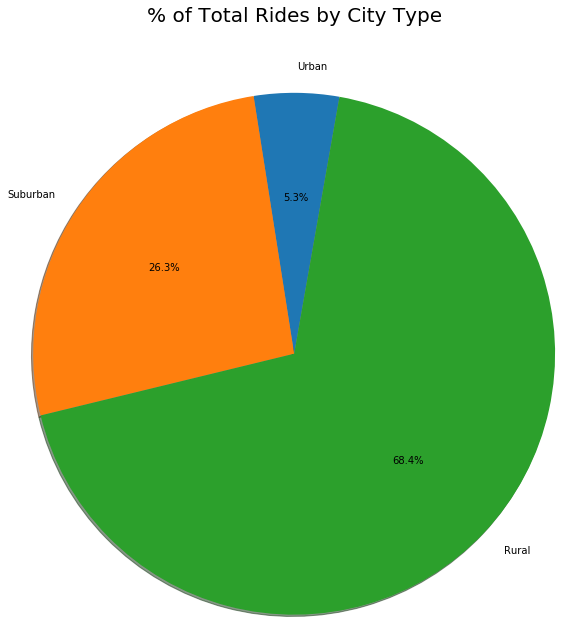

In [12]:
rides_urban = urban_df["fare"].count
rides_suburban = suburban_df["fare"].count
rides_rural = rural_df["fare"].count
# Build Pie Chart
rides_labels = "Urban", "Suburban", "Rural"
rides_totals = [rides_urban, rides_suburban, rides_rural]
rides_colors = ["r", "b", "y"]

plt.axis("equal")
plt.title("% of Total Rides by City Type", y=2.00, fontsize=20)
plt.pie(totals_drivers, radius=3, labels=rides_labels, autopct="%1.1f%%", shadow=True, startangle=80)
# Save Figure

In [13]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x24c5ae0c978>,
 [Text(2.344726452360088, 2.322123567686026, 'Urban'),
  Text(0.6422248530131134, 3.3387942791032046, 'Suburban'),
  Text(-0.8880175567107949, -3.178273874129382, 'Rural')],
 [Text(1.2789417012873205, 1.2666128551014686, '2.6%'),
  Text(0.3588903590367397, 1.865796803028261, '16.5%'),
  Text(-0.48437321275134254, -1.733603931343299, '80.9%')])

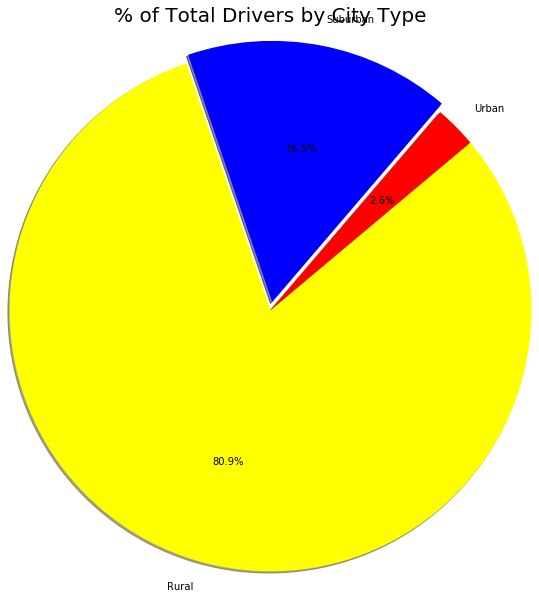

In [17]:
# Calculate Driver Percents
drivers_df = city_data_df.groupby('type')
drivers_total = drivers_df['driver_count'].sum()

urban_total_drivers = city_data_df.groupby(["city"]).mean()["driver_count"]
suburban_total_drivers =  city_data_df.groupby(["city"]).mean()["driver_count"]
rural_total_drivers =  city_data_df.groupby(["city"]).mean()["driver_count"]


drivers_labels = ['Urban', 'Suburban', "Rural"]
drivers_totals = [drivers_total['Urban'], drivers_total['Suburban'], drivers_total['Rural']]
drivers_colors = ["red", "blue", "yellow"]

# Build Pie Charts
plt.axis("equal")
plt.title("% of Total Drivers by City Type", y=1.80, fontsize=20)
plt.pie(drivers_total, radius=3, labels=drivers_labels, explode=explode, 
        colors=drivers_colors, autopct="%.1f%%", shadow=True, startangle=40)
# Save Figure


In [15]:
# Show Figure
plt.show()